In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('../input/goodreads-best-books/book_data.csv')
df.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


In [3]:
df['book_isbn'] = (~df['book_isbn'].isna()).astype(int)
df = df.dropna(subset=['image_url'])

In [4]:
df['book_pages'] = df['book_pages'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) else np.nan)

In [5]:
del df['image_url']
del df['book_edition']

In [6]:
df = df.reset_index()

In [7]:
df.iloc[53617]['index']

54300

In [8]:
'''# get unique genres
df['genres'] = df['genres'].fillna('')
genres = set('|'.join(df['genres']).split('|'))

# create new data frame with one-hot encoding
one_hot_df = pd.DataFrame(columns=list(genres))
for i, row in df.iterrows():
    genres_list = row['genres'].split('|')
    one_hot_row = {genre: 1 if genre in genres_list else 0 for genre in genres}
    one_hot_df = one_hot_df.append(one_hot_row, ignore_index=True)'''

"# get unique genres\ndf['genres'] = df['genres'].fillna('')\ngenres = set('|'.join(df['genres']).split('|'))\n\n# create new data frame with one-hot encoding\none_hot_df = pd.DataFrame(columns=list(genres))\nfor i, row in df.iterrows():\n    genres_list = row['genres'].split('|')\n    one_hot_row = {genre: 1 if genre in genres_list else 0 for genre in genres}\n    one_hot_df = one_hot_df.append(one_hot_row, ignore_index=True)"

In [9]:
genres = {
	'Biblical': 'Religion',
	'Maps': 'Nonfiction',
	'Yuri': 'Comics',
	'Fantasy': 'Romance',
	'Evolution': 'Science',
	'Cities': 'Nonfiction',
	'Sexuality': 'Nonfiction',
	'Mine': 'War',
	'Post': 'Colonial',
	'Rock N Roll': 'Music',
	'Social Media': 'Nonfiction',
	'Liberia': 'African Literature',
	'History Of Science': 'History',
	'Vegetarian': 'Nonfiction',
	'Ornithology': 'Science',
	'Christian': 'Romance',
	'Graphic': 'Nonfiction',
	'Finance': 'Business',
	'Combat': 'War',
	'Love': 'Fiction',
	'Forgotten Realms': 'Fantasy',
	'Buddhism': 'Religion',
	'Islam': 'Religion',
	'M M Science Fiction': 'Romance',
	'': 'NaN',
	'Fables': 'Fiction',
	'Fiction': 'Books',
	'Academics': 'Study',
	'Swedish Literature': 'European Literature',
	'Nsfw': 'Nonfiction',
	'Tv': 'Nonfiction',
	'Classic Literature': 'Literature',
	'Belgian': 'European Literature',
	'American Revolutionary War': 'History',
	'Westerns': 'Fiction',
	'Literary Fiction': 'Fiction',
	'Magic': 'Fantasy',
	'Lovecraftian': 'Horror',
	'Young': 'Adult Paranormal',
	'Vampires': 'Fantasy',
	'Splatterpunk': 'Horror',
	'Chick Lit': 'Fiction',
	'Fairies': 'Fantasy',
	'Linguistics': 'Nonfiction',
	'M M F': 'Romance',
	'Counter Culture': 'Nonfiction',
	'Space': 'Science Fiction',
	'Classics': 'Literature',
	'Music': 'Nonfiction',
	'Aliens': 'Science Fiction',
	'Banned Books': 'Nonfiction',
	'North American Hi...': 'Fiction',
	'Algorithms': 'Nonfiction',
	'Georgian': 'European Literature',
	'Theory': 'Nonfiction',
	'Amish Fiction': 'Fiction',
	'Mixed Martial Arts': 'Sports',
	'Social Justice': 'Nonfiction',
	'Young Adult Historical Fiction': 'Historical Fiction',
	'Russian History': 'History',
	'Jazz': 'Music',
	'Weird': 'Fiction',
	'Literature': 'Books',
	'Church': 'Religion',
	'Memoir': 'Nonfiction',
	'Wildlife': 'Nature',
	'Poetry': 'Literature',
	'Green': 'Nonfiction',
	'Own': 'Nonfiction',
	'Espionage': 'Fiction',
	'Cultural': 'Studies',
	'Comic Book': 'Comics',
	'Paranormal': 'Fantasy',
	'Historical Fantasy': 'Fantasy',
	'Roman': 'European Literature',
	'Horror': 'Fiction',
	'Suspense': 'Fiction',
	'Dystopia': 'Fiction',
	'Nursing': 'Nurses',
	'Adoption': 'Childrens',
	'New': 'Weird',
	'Bulgarian Literature': 'European Literature',
	'Librarian': 'Nonfiction',
	'Local History': 'History',
	'Astronomy': 'Science',
	'Fashion': 'Nonfiction',
	'Cthulhu Mythos': 'Horror',
	'Science': 'Nature',
	'Food and Drink': 'Nonfiction',
	'Alchemy': 'Nonfiction',
	'Holocaust': 'History',
	'Vegan': 'Food and Drink',
	'Mathematics': 'Science',
	'Mountaineering': 'Sports',
	'Programming': 'Technology',
	'Zen': 'Eastern Philosophy',
	'Marathi': 'Asian Literature',
	'Palaeontology': 'Science',
	'Witches': 'Fantasy',
	'Travel': 'Nonfiction',
	'Contemporary': 'Fiction',
	'Museology': 'Nonfiction',
	'Dinosaurs': 'Science',
	'Bangladesh': 'Asian Literature',
	'Morocco': 'African Literature',
	'Namibia': 'Country',
	'Food Preservation': 'Food and Drink',
	'Social Issues': 'Nonfiction',
	'Police': 'Nonfiction',
	'Romanovs': 'History',
	'Graphic Novels Comics': 'Comics',
	'Language': 'Nonfiction',
	'Sequential Art': 'Graphic Novels',
	'Scotland': 'European Literature',
	'Physics': 'Science',
	'21st': 'Century',
	'Adult': 'Fiction',
	'Holiday': 'Fiction',
	'Birth Control': 'Health and Wellness',
	'Hinduism': 'Eastern Philosophy',
	'Comics': 'Graphic Novels',
	'Ancient': 'History',
	'High Fantasy': 'Fantasy',
	'Journal': 'Journal',
	'Sociology': 'Nonfiction',
	'Church History': 'Religion',
	'Unfinished': 'Books',
	'Internet': 'IT',
	'Logic': 'Nonfiction',
	'Polygamy': 'Relationships',
	'Yaoi': 'Comics',
	'Food History': 'Food and Drink',
	'Banned Books': 'Books',
	'Senegal': 'African Literature',
	'18th Century': 'Historical Fiction',
	'Atheism': 'Religion',
	'Photography': 'Art',
	'Dutch Literature': 'European Literature',
	'14th Century': 'Historical Fiction',
	'Fiction': 'Fiction',
	'Aviation': 'Nonfiction',
	'Hackers': 'IT',
	'Cultural': 'Nonfiction',
	'Steampunk': 'Fantasy',
	'Denmark': 'European Literature',
	'Apocalyptic': 'Fiction',
	'Glbt': 'Fiction',
	'Comics Manga': 'Comics',
	'Hip Hop': 'Music',
	'Kids': 'Childrens',
	'Humanities': 'Nonfiction',
	'Comics Bd': 'Comics',
	'Love Inspired Historical': 'Romance',
	'Architecture': 'Art',
	'Animals': 'Nature',
	'Sexual Health': 'Health and Wellness',
	'Unicorns': 'Fantasy',
	'Young Adult Romance': 'Young Adult',
	'Crafts': 'Nonfiction',
	'Americana': 'Fiction',
	'Spirituality': 'Religion',
	'Genetics': 'Science',
	'School Stories': 'Childrens',
	'Urban': 'Nonfiction',
	'Josei': 'Josei',
	'Gay': 'Fiction',
	'Military Fiction': 'Fiction',
	'Asian Literature': 'Books',
	'Art': 'Nonfiction',
	'Space Opera': 'Science Fiction',
	'Young Adult Contemporary': 'Young Adult',
	'Crime': 'Fiction',
	'Regency': 'Historical Fiction',
	'Utopia': 'Fiction',
	'Australia': 'Continents',
	'Western Africa': 'Continents',
	'True Crime': 'Nonfiction',
	'German Literature': 'European Literature',
	'Dragonlance': 'Fantasy',
	'Zimbabwe': 'African Literature',
	'African': 'American Literature',
	'Witchcraft': 'Fantasy',
	'M M Paranormal': 'Romance',
	'Polish Literature': 'European Literature',
	'Erotic': 'Horror',
	'Psychology': 'Nonfiction',
	'Bdsm': 'Erotica',
	'Humor': 'Fiction',
	'Illness': 'Nonfiction',
	'Tudor Period': 'Historical Fiction',
	'New Age': 'Spirituality',
	'Academia': 'Nonfiction',
	'Military': 'Nonfiction',
	'Horticulture': 'Nonfiction',
	'Fantasy': 'Fiction',
	'The Americas': 'Nonfiction',
	'Islamic': 'Religion',
	'Western Historical Romance': 'Romance',
	'Nonfiction': 'Books',
	'Medical': 'Nonfiction',
	'Ireland': 'European Literature',
	'Library Science': 'Nonfiction',
	'Italian Literature': 'European Literature',
	'Arthurian': 'Fantasy',
	'Gothic': 'Horror',
	'Victorian': 'Historical Fiction',
	'Musicals': 'Music',
	'Management': 'Nonfiction',
	'Death': 'Nonfiction',
	'Disability': 'Nonfiction',
	'Manhwa': 'Comics',
	'Anthropomorphic': 'Fiction',
	'Catholic': 'Religion',
	'Epic Fantasy': 'Fantasy',
	'Cyberpunk': 'Science Fiction',
	'Ethnography': 'Nonfiction',
	'Interracial Romance': 'Romance',
	'Abuse': 'Nonfiction',
	'Google': 'IT',
	'Short Story Collection': 'Fiction',
	'Motorcycle': 'Nonfiction',
	'Dc Comics': 'Comics',
	'Development': 'International',
	'Did Not Finish': 'Books',
	'Role Playing Games': 'Games',
	'Criticism': 'Nonfiction',
	'Law': 'Nonfiction', 'Romantic Suspense': 'Romance',
	'Childrens': 'Fiction',
	'Collections': 'Literature',
	'Fitness': 'Health',
	'Lesbian Romance': 'Romance',
	'Biography': 'Books',
	'Prayer': 'Gamaes',
	'Lesbian': 'Fiction',
	'Design': 'Art',
	'Diets': 'Health and Wellness',
	'Harlequin Desire': 'Romance',
	'Womens Studies': 'Nonfiction',
	'Psychological Thriller': 'Thriller',
	'Alcohol': 'Nonfiction',
	'Emergency Services': 'Nonfiction',
	'Retellings': 'Fiction',
	'Lds': 'Religion',
	'Geology': 'Science',
	'Indonesian Literature': 'Asian Literature',
	'Transgender': 'Lgbt',
	'Gastronomy': 'Food and Drink',
	'Guidebook': 'Nonfiction',
	'Dying': 'Earth',
	'Science Fiction Romance': 'Romance',
	'Northern Africa': 'Continents',
	'Harlequin Heartwarming': 'Romance',
	'Young Adult Fantasy': 'Young Adult',
	'Post Apocalyptic': 'Fiction',
	'Latin American': 'Books',
	'Poverty': 'Social Issues',
	'Queer Lit': 'Fiction',
	'Slice Of Life': 'Fiction',
	'Heroic': 'Fantasy',
	'Spanish': 'History',
	'Mozambique': 'African Literature',
	'Plants': 'Science',
	'Canadian': 'Literature',
	'World Of Darkness': 'Games',
	'Ghost': 'Stories',
	'F M': '+18',
	'Occult': 'Religion',
	'Romanian Literature': 'European Literature',
	'Usability': 'Nonfiction',
	'Sports': 'Nonfiction',
	'Italy': 'European Literature',
	'X Men': 'Comics',
	'Jewellery': 'Fashion',
	'Business': 'Nonfiction',
	'Short Stories': 'Fiction',
	'Nutrition': 'Nonfiction',
	'Rel...': 'International',
	'Plus Size': 'Fashion',
	'Beer': '+18',
	'Sudan': 'African Literature',
	'How To': 'Nonfiction',
	'Science Fiction Fantasy': 'Science Fiction',
	'Walking': 'Sports',
	'Folklore': 'Nonfiction',
	'Ancient History': 'History',
	'Fat': 'Nonfiction',
	'Poetry': 'Nonfiction',
	'Coding': 'IT',
	'Supernatural': 'Fantasy',
	'12th Century': 'Historical Fiction',
	'Psychoanalysis': 'Psychology',
	'Mail Order Brides': 'Romance',
	'Storytime': 'Childrens',
	'Sweden': 'European Literature',
	'Native': 'American History',
	'Football': 'Sports',
	'Musicians': 'Biography',
	'Essays': 'Nonfiction',
	'Medievalism': 'History',
	'European Literature': 'Literature',
	'World War I': 'Historical Fiction',
	'Zombies': 'Fantasy',
	'Railways': 'Nonfiction',
	'Somalia': 'Country',
	'Jewish': 'Religion',
	'Reverse': 'Harem',
	'Latin American Literature': 'American Literature',
	'Art and Photography': 'Art',
	'Spy Thriller': 'Thriller',
	'Brazil': 'American Literature',
	'Angola': 'Сountry',
	'Presidents': 'Biography',
	'Eastern Africa': 'Continents',
	'Judaica': 'Religion',
	'Education': 'Nonfiction',
	'Banking': 'Nonfiction',
	'Social': 'Nonfiction',
	'Detective': 'Mystery',
	'Gay Fiction': 'Fiction',
	'Cartoon': 'Comics',
	'Prehistoric': 'Historical Fiction',
	'Academic': 'Nonfiction',
	'Polyamory': 'Relationships',
	'Drama': 'Books',
	'American Revolution': 'Historical Fiction',
	'Bizarro Fiction': 'Fiction',
	'Martial': 'Arts',
	'France': 'European Literature',
	'Survival': 'Nonfiction',
	'Modernism': 'Nonfiction',
	'Legal Thriller': 'Thriller',
	'Audiobook': 'Books',
	'Adventure': 'Fiction',
	'Southern': 'Fiction',
	'Shounen Ai': 'Comics',
	'Battle Of Britain': 'History',
	'American Civil War': 'Historical Fiction',
	'Irish Literature': 'European Literature',
	'Harlequin': 'Blaze',
	'Gay For You': 'Romance',
	'Cinderella': 'Fairy tale',
	'Princesses': 'Fairy tale',
	'1st': 'Grade',
	'Paranormal Mystery': 'Mystery',
	'Agriculture': 'Nonfiction',
	'New Adult': 'Fiction',
	'Animal Fiction': 'Fiction',
	'Health Care': 'Nonfiction',
	'Anarchism': 'Religion',
	'Christian': 'Fantasy',
	'Young Readers': 'Childrens',
	'19th Century': 'Historical Fiction',
	'Western': 'Romance',
	'Family': 'Law',
	'Superman': 'Comics',
	'Funny': 'Fiction',
	'British Literature': 'Literature',
	'Cats': 'Animals',
	'Muslims': 'Religion',
	'Biography Memoir': 'Biography',
	'Bande': 'Dessinée',
	'Fighters': 'Sports',
	'Counselling': 'Nonfiction',
	'Harem': 'Fiction',
	'Anime': 'Comics',
	'Native Americans': 'History',
	'Natural History': 'Science',
	'Anthropology': 'Social Sciences',
	'Baha I': 'Religion',
	'English Literature': 'European Literature',
	'Silhouette': 'Art',
	'Wolves': 'Animals',
	'Angels': 'Fantasy',
	'South Africa': 'African Literature',
	'Theology': 'Religion',
	'Botswana': 'African Literature',
	'Queer': 'Fiction',
	'Russia': 'European Literature',
	'Christian Living': 'Religion',
	'China': 'Asian Literature',
	'Egyptian Literature': 'African Literature',
	'Computers': 'Nonfiction',
	'Fairy Tale Retellings': 'Fiction',
	'American History': 'History',
	'Thriller': 'Fiction',
	'Information Science': 'Nonfiction',
	'Firefighters': 'Nonfiction',
	'African American': 'Fiction',
	'Fae': 'Fantasy',
	'Mystery Thriller': 'Thriller',
	'Genderqueer': 'Nonfiction',
	'The United States Of America': 'American Literature',
	'Cartography': 'Nonfiction',
	'Hockey': 'Sport',
	'Video': 'Games',
	'Iran': 'Asian Literature',
	'Disability Studies': 'Nonfiction',
	'Social Science': 'Nonfiction',
	'Serial Killers': 'Nonfiction',
	'Central': 'Africa',
	'Culture': 'Nonfiction',
	'Bulgaria': 'European Literature',
	'Loveswept': 'Love',
	'Nazi Party': 'History',
	'Relations': 'International',
	'Ukraine': 'European Literature',
	'Christianity': 'Religion',
	'Anthologies': 'Collections',
	'War': 'Fiction',
	'Road Trip': 'Fiction',
	'Soccer': 'Sports',
	'International': 'Nonfiction',
	'Web': 'IT',
	'Sword and Planet': 'Science Fiction',
	'Basketball': 'Sports',
	'Quantum Mechanics': 'Science',
	'Poetry Plays': 'Literature',
	'Turkish': 'European Literature',
	'Nonfiction': 'Nonfiction',
	'Amazon': 'Nonfiction',
	'Outdoors': 'Nonfiction',
	'Gamebooks': 'Game',
	'Scripture': 'Religion',
	'Journalism': 'Nonfiction',
	'Southern Gothic': 'Fiction',
	'True Story': 'Nonfiction',
	'American': 'Fiction',
	'漫画': 'Manga',
	'Game': 'Games',
	'Climate': 'Change',
	'Albanian Literature': 'European Literature',
	'Kenya': 'African Literature',
	'Science Fiction': 'Fiction',
	'Sewing': 'Crafts',
	'Urban Fantasy': 'Fantasy',
	'Komik': 'Comics',
	'Aspergers': 'Nonfiction',
	'Sex Work': 'Nonfiction',
	'Graphic Novels': 'Books',
	'Psychiatry': 'Nonfiction',
	'Gender Studies': 'Nonfiction',
	'Magick': 'Fantasy',
	'Swashbuckling': 'Fiction',
	'Tea': 'Food and Drink',
	'Ghosts': 'Supernatural',
	'Choose': 'Your Own Adventure',
	'Cooking': 'Food and Drink',
	'Japan': 'Asian Literature',
	'Theatre': 'Drama',
	'German History': 'European History',
	'Romania': 'European Literature',
	'Old Testament': 'Religion',
	'Knitting': 'Nonfiction',
	'Self Help': 'Nonfiction',
	'Tragedy': 'Drama',
	'Wilderness': 'Nature',
	'Classical Music': 'Music',
	'Art History': 'Art',
	'Graphic Novels': 'Comics',
	'English': 'Civil War',
	'Graphic Novels Manga': 'Comics',
	'Mills and Boon': 'Romance',
	'Africa': 'Continents',
	'Cult Classics': 'Fiction',
	'Nobel Prize': 'Nonfiction',
	'English History': 'European Literature',
	'History': 'Nonfiction',
	'Labor': 'Nonfiction',
	'Turkish Literature': 'European Literature',
	'Harlequin Nocturne': 'Romance',
	'Environment': 'Nonfiction',
	'Cookbooks': 'Food and Drink',
	'11th Century': 'Historical Fiction',
	'Womens': 'Fiction',
	'Ecology': 'Science',
	'15th Century': 'Historical Fiction',
	'Russian Literature': 'European Literature',
	'Sports and Games': 'Sports',
	'Food Writing': 'Nonfiction',
	'Nurses': 'Nurses',
	'Social Movements': 'Nonfiction',
	'Electrical': 'Engineering',
	'Novella': 'Fiction',
	'Social Work': 'Nonfiction',
	'M M M': 'Romance',
	'Mormonism': 'Religion',
	'Dogs': 'Animals',
	'Theosophy': 'Religion',
	'Health': 'Nonfiction',
	'Faith': 'Religion',
	'Time Travel Romance': 'Romance',
	'Gaming': 'Hobbies and Games',
	'Cults': 'Nonfiction',
	'Sci Fi Fantasy': 'Science Fiction',
	'Counting': 'Nonfiction',
	'Shojo': 'Comics',
	'Peak Oil': 'Nonfiction',
	'Roman': 'Britain',
	'Divorce': 'Nonfiction',
	'Finnish Literature': 'European Literature',
	'Amish': 'Religion',
	'Democratic': 'Republic Of The ...',
	'Germany': 'European Literature',
	'Webcomic': 'Comics',
	'Adult Fiction': 'Fiction',
	'Canon': 'Nonfiction',
	'Asia': 'Continents',
	'Sex Work': '18+',
	'Southern Africa': 'Continents',
	'Serbian Literature': 'European Literature',
	'Divination': 'Religion',
	'Scandinavian': 'Lite...',
	'History and Politics': 'Nonfiction',
	'Fostering': 'Earth',
	'Currency': 'Nonfiction',
	'Rwanda': 'African Literature',
	'Pirates': 'Adventure',
	'Myanmar': 'Asian Literature',
	'European History': 'History',
	'Esp': 'Fiction',
	'Greek Mythology': 'Mythology',
	'Travelogue': 'Nonfiction',
	'Ghana': 'African Literature',
	'M Fantasy': 'Fantasy',
	'Marriage': 'Nonfiction',
	'London Underground': 'Nonfiction',
	'Dictionaries': 'Reference',
	'Gothic Romance': 'Romance',
	'Dinosaurs': 'Animals',
	'God': 'Religion',
	'Tasmania': 'Australian Literature',
	'Money': 'Nonfiction',
	'Russian Revolution': 'History',
	'United': 'States',
	'Memoir': 'Biography',
	'Light Novel': 'Fiction',
	'Woodwork': 'Nature',
	'Autobiography': 'Nonfiction',
	'Vikings': 'Historical Fiction',
	'Science': 'Fiction R...',
	'School': 'Education',
	'African Literature': 'Books',
	'Film': 'Nonfiction',
	'1917': 'History',
	'Colouring Books': 'Art',
	'Murder Mystery': 'Mystery',
	'40k': 'Games',
	'Belgium': 'European Literature',
	'Wonder Woman': 'Comics',
	'Demons': 'Fantasy',
	'Herbs': 'Health and Wellness',
	'Horse': 'Animals',
	'Mental Health': 'Health',
	'Batman': 'Comics',
	'Games': 'Hobbies and Games',
	'Tanzania': 'Country',
	'Chinese Literature': 'Asian Literature',
	'Planets': 'Earth',
	'Nature': 'Nonfiction',
	'Grad School': 'Nonfiction',
	'Trains': 'Nonfiction',
	'Students': 'Nonfiction',
	'Spanish Literature': 'European Literature',
	'Benin': 'African Literature',
	'Textbooks': 'Nonfiction',
	'Wicca': 'Religion',
	'Eastern Philosophy': 'Philosophy',
	'Category': 'Romance',
	'Lgbt': 'Fiction',
	'Brain': 'Science',
	'Contemporary Romance': 'Romance',
	'Book Club': 'Fiction',
	'Activism': 'Nonfiction',
	'Indian Literature': 'Asian Literature',
	'Religious Fiction': 'Fiction',
	'Surreal': 'Art',
	'Baseball': 'Sports',
	'Evangelism': 'Religion',
	'Wine': 'Food and Drink',
	'Futurism': 'Nonfiction',
	'20th Century': 'Historical Fiction',
	'Paranormal Romance': 'Romance',
	'Political Science': 'Nonfiction',
	'Harlequin Historical': 'Romance',
	'Comix': 'Comedy',
	'Pop Culture': 'Nonfiction',
	'World War II': 'Historical Fiction',
	'Childrens Classics': 'Childrens',
	'Paganism': 'Religion',
	'Love Story': 'Romance',
	'Weird': 'West',
	'Gnosticism': 'Religion',
	'Traditional Regency': 'Romance',
	'Coming Of Age': 'Fiction',
	'Feminism': 'Social Issues',
	'Spider Man': 'Comics',
	'The World': 'Nonfiction',
	'New': 'Adult Romance',
	'Fairy Tales': 'Fantasy',
	'Aircraft': 'Nonfiction',
	'Picture Books': 'Childrens',
	'Ukrainian': 'Literature',
	'Middle Grade': 'Books',
	'Star Trek Voyager': 'Science Fiction',
	'Biblical Fiction': 'Historical Fiction',
	'Modern': 'Nonfiction',
	'Archaeology': 'Nonfiction',
	'Aeroplanes': 'Nonfiction',
	'Japanese': 'History',
	'Engineering': 'Nonfiction',
	'Futuristic': 'Romance',
	'Punk': 'Fiction',
	'Gay Romance': 'Romance',
	'Gods': 'Religion',
	'Abandoned': 'Books',
	'Christian': 'Religion',
	'Harlequin Romance': 'Romance',
	'Urban Planning': 'Nonfiction',
	'Juvenile': 'Books',
	'Warcraft': 'Games',
	'Politics': 'Nonfiction',
	'Gender': 'Social Issues',
	'13th Century': 'Historical Fiction',
	'Boarding School': 'Childrens',
	'Disease': 'Disease',
	'Goddess': 'Religion',
	'Uganda': 'African Literature',
	'Classical Studies': 'Nonfiction',
	'New Testament': 'Religion',
	'Mystery': 'Fiction',
	'American Fiction': 'Fiction',
	'Museums': 'Nonfiction',
	'Danish': 'European Literature',
	'Epic': 'Fiction',
	'Speculative Fiction': 'Fiction',
	'Harlequin': 'Romance',
	'Urbanism': 'Nonfiction',
	'Technical': 'Nonfiction',
	'Music': 'Music',
	'Medieval Romance': 'Romance',
	'Plantagenet': 'Historical Fiction',
	'French Revolution': 'History',
	'Sustainability': 'Nonfiction',
	'Family': 'Fiction',
	'Journaling': 'Journal',
	'Cozy Mystery': 'Mystery',
	'Pakistan': 'Asian Literature',
	'Cross': 'Dressing',
	'Erotic Romance': 'Romance',
	'Historical Romance': 'Romance',
	'Warfare': 'History',
	'Gender': 'and Sexuality',
	'Dark Fantasy': 'Fantasy',
	'Canada': 'Fiction',
	'Egyptology': 'Nonfiction',
	'Hungarian': 'Literature',
	'Alternate History': 'Fiction',
	'Nursery': 'Rhymes',
	'Superheroes': 'Comics',
	'Far': 'Right',
	'Quilting': 'Crafts',
	'Muslimah': 'Religion',
	'India': 'Asian Literature',
	'Manga Romance': 'Romance',
	'Ecclesiology': 'Religion',
	'International Dev...': 'Nonfiction',
	'Oceanography': 'Science',
	'Fan Fiction': 'Fiction',
	'Mental Illness': 'Health',
	'Read For College': 'Nonfiction',
	'Romance': 'Fiction',
	'Paranormal Urban Fantasy': 'Fantasy',
	'Inspirational': 'Religion',
	'Chess': 'Sports',
	'Female Authors': 'Nonfiction',
	'Biography': 'Nonfiction',
	'Bisexual': '+18',
	'Mali': 'African Literature',
	'Holocaust': 'Historical Fiction',
	'Buisness': 'Business',
	'Parenting': 'Childrens',
	'Menage': 'Romance',
	'16th': 'Century',
	'Egypt': 'African Literature',
	'Manga': 'Comics',
	'Horses': 'Animals',
	'French Literature': 'European Literature',
	'World History': 'History',
	'Historical': 'History',
	'Military Science Fiction': 'Science Fiction',
	'Doctor Who': 'Science Fiction',
	'Mmorpg': 'Games',
	'Ancient Greece': 'Historical Fiction',
	'World Of Warcraft': 'Games',
	'Werewolves': 'Fantasy',
	'Mythology': 'Fantasy',
	'Website Design': 'Art',
	'Dragons': 'Fantasy',
	'Urban Studies': 'Nonfiction',
	'Adolescence': 'Childrens',
	'Wizards': 'Fantasy',
	'Esoterica': 'Nonfiction',
	'Mysticism': 'Religion',
	'Spiritualism': 'Religion',
	'Polyamorous': '+18',
	'Nordic': 'Noir',
	'Queer Studies': 'Nonfiction',
	'High School': 'Education',
	'Ivory': 'Coast',
	'Gardening': 'Nonfiction',
	'Civil War': 'Historical Fiction',
	'Chapter': 'Books',
	'Christian': 'Nonfiction',
	'Neuroscience': 'Science',
	'Historical Fiction': 'Fiction',
	'Soviet': 'History',
	'Economics': 'Nonfiction',
	'Anthropomorphic': 'Fiction',
	'Folk Tales': 'Fiction',
	'Portuguese Literature': 'European Literature',
	'Philosophy': 'Nonfiction',
	'Books About Books': 'Nonfiction',
	'Read For School': 'Education',
	'Lesbian Fiction': 'Fiction',
	'Mythopoeia': 'Nonfiction',
	'Race': 'Social Issues',
	'Romantic': 'Romance',
	'Comic Strips': 'Comics',
	'Medieval History': 'History',
	'Writing': 'Nonfiction',
	'Romanticism': 'Literature',
	'Computer Science': 'Science',
	'Lds Fiction': 'Fiction',
	'Led Zeppelin': 'Music',
	'Entrepreneurship': 'Business',
	'Christian': 'Historical Fiction',
	'Christian Fiction': 'Fiction',
	'Hungary': 'European Literature',
	'Nerd': 'Science',
	'Geography': 'Earth',
	'Cuisine': 'Food and Drink',
	'Alternative Medicine': 'Health and Wellness',
	'Civil': 'War History',
	'Spain': 'European Literature',
	'Social Change': 'Nonfiction',
	'Sierra Leone': 'African Literature',
	'Buffy The Vampire Slayer': 'Fantasy',
	'Skepticism': 'Philosophy',
	'Shonen': 'Comics',
	'Semiotics': 'Science',
	'Go': 'Games',
	'Eritrea': 'African Literature',
	'Religion': 'Nonfiction',
	'Brewing': 'Food and Drink',
	'Futuristic': 'Science Fiction',
	'Rabbits': 'Animals',
	'Government': 'Nonfiction',
	'Food': 'Nonfiction',
	'Algeria': 'Сountry',
	'Ethiopia': 'African Literature',
	'Mythology': 'Nonfiction',
	'College': 'Education',
	'Time Travel': 'Science Fiction',
	'Czech Literature': 'European Literature',
	'Research': 'Nonfiction',
	'Clean Romance': 'Romance',
	'Alcohol': '18+',
	'Lebanon': 'Middle Eastern Literature',
	'Spanish': 'Civil War',
	'M M Historical Romance': 'Romance',
	'Dark': 'Fiction',
	'Couture': 'Fashion',
	'Culinary': 'Food and Drink',
	'Dystopia': 'Science Fiction',
	'Comedy': 'Fiction',
	'Number': 'Nonfiction',
	'Low Fantasy': 'Fantasy',
	'Mermaids': 'Fantasy',
	'Hqn': 'Romance',
	'Prostitution': 'Nonfiction',
	'Historical': 'Historical Fiction',
	'Epic Poetry': 'Poetry',
	'Hard Science Fiction': 'Science Fiction',
	'Planetary Romance': 'Science Fiction',
	'Science': 'Nonfiction',
	'Asexual': '+18',
	'Portugal': 'European Literature',
	'Erotica': 'Fiction',
	'Realistic Fiction': 'Fiction',
	'Medicine': 'Nonfiction',
	'Greece': 'European Literature',
	'Leadership': 'Nonfiction',
	'Foodie': 'Food and Drink',
	'Human Development': 'Nonfiction',
	'Reference': 'Nonfiction',
	'Israel': 'Asian Literature',
	'Scandinavian Literature': 'European Literature',
	'Chemistry': 'Science',
	'Nigeria': 'African Literature',
	'Action': 'Fiction',
	'Womens Fiction': 'Fiction',
	'Astrology': 'Nonfiction',
	'Prehistory': 'History',
	'Siglo': 'De Oro',
	'Teachers': 'Childrens',
	'Pornography': 'Nonfiction',
	'Popular': 'Science',
	'2nd Grade': 'Childrens',
	'Communication': 'Communication',
	'Conservation': 'Communication',
	'Hard Boiled': 'Mystery',
	'Artificial Intelligence': 'Science',
	'Guides': 'Nonfiction',
	'Novels': 'Books',
	'Teaching': 'Childrens',
	'Japanese Literature': 'Asian Literature',
	'Subways': 'Nonfiction',
	'Transport': 'Nonfiction',
	'Terrorism': 'Nonfiction',
	'Cycling': 'Sports',
	'Africa': 'Nonfiction',
	'Sports Romance': 'Romance',
	'Strippers': '+18',
	'Magical Realism': 'Fiction',
	'Young Adult': 'Fiction',
	'Cars': 'Nonfiction',
	'Hugo': 'Awards',
	'Us Presidents': 'Biography',
	'Microhistory': 'History',
	'Childrens': 'Books',
	'Society': 'Nonfiction',
	'New York': 'American Literature',
	'African American Romance': 'Romance',
	'Star Wars': 'Science Fiction',
	'Regency Romance': 'Romance',
	'Medieval': 'Historical Fiction',
	'Halloween': 'Fiction',
	'Metaphysics': 'Philosophy',
	'Productivity': 'Nonfiction',
	'Apple': 'Technology',
	'Robots': 'Science Fiction',
	'Literary Criticism': 'Nonfiction',
	'Birds': 'Science',
	'Shapeshifters': 'Fantasy',
	'Gothic': 'Fiction',
	'Teen': 'Fiction',
	'Adaptations': 'Nonfiction',
	'Sword and Sorcery': 'Fantasy',
	'Thelema': 'Religion',
	'Pulp': 'Fiction',
	'Movies': 'Nonfiction',
	'Beauty and The Beast': 'Fiction',
	'Taoism': 'Eastern Philosophy',
	'Fat Acceptance': 'Nonfiction',
	'Maritime': 'Nonfiction',
	'Poland': 'European Literature',
	'Art Design': 'Art',
	'Autobiography': 'Biography',
	'Satanism': 'Religion',
	'Earth': 'Science',
	'Noir': 'Fiction',
	'Love': 'Love',
	'Class': 'Nonfiction',
	'17th Century': 'Historical Fiction',
	'Golden': 'Age Mystery',
	'Star': 'Trek',
	'Tarot': 'Spirituality',
	'Plays': 'Drama',
	'Boys Love': 'Comics',
	'Modern Classics': 'Fiction',
	'Monarchy': 'Nonfiction',
	'Climbing': 'Sports',
	'Dungeons and Dragons': 'Games',
	'Personal Finance': 'Nonfiction',
	'Relationships': 'Nonfiction',
	'Field': 'Guides',
	'Diary': 'Nonfiction',
	'Marvel': 'Comics',
	'Military History': 'History',
	'Software': 'Technology',
	'10th Century': 'Historical Fiction',
	'Personal Development': 'Nonfiction',
	'Drawing': 'Art',
	'Technology': 'Nonfiction',
	'M M Romance': 'Romance',
	'Seinen': 'Comics',
	'Media Tie In': 'Fiction',
	'Trivia': 'Nonfiction',
	'Biology': 'Science',
	'Flash Fiction': 'Fiction',
	'Military Romance': 'Romance',
	'Judaism': 'Religion',
	'Christmas': 'Holiday',
    '16th Century': 'History',
    '1st Grade': 'Childrens',
    '21st Century': 'History',
    'African American Literature': 'Literature',
    'Bande Dessinée':'Comics',
    'Canadian Literature' : 'Literature',
    'Category Romance': 'Romance',
    'Central Africa':'Country',
    'Chapter Books': 'Books',
    'Choose Your Own Adventure':'Fiction',
    
    
    
    }

In [10]:
len(genres.keys())

867

In [11]:
len(set(genres.values()))

113

In [12]:
needed_genres = set(df['genres'].str.split('|').explode().unique().tolist())
last = needed_genres.difference(genres.keys())
last

{'Christian Fantasy',
 'Christian Historical Fiction',
 'Christian Non Fiction',
 'Christian Romance',
 'Civil War History',
 'Climate Change',
 'Cross Dressing',
 'Cultural Studies',
 'Democratic Republic Of The ...',
 'Dying Earth',
 'Electrical Engineering',
 'English Civil War',
 'Erotic Horror',
 'Family Law',
 'Fantasy Romance',
 'Far Right',
 'Field Guides',
 'Futuristic Romance',
 'Game Design',
 'Gender and Sexuality',
 'Ghost Stories',
 'Golden Age Mystery',
 'Gothic Horror',
 'Graphic Non Fiction',
 'Harlequin Blaze',
 'Heroic Fantasy',
 'Historical Mystery',
 'Horse Racing',
 'Hugo Awards',
 'Hungarian Literature',
 'International Development',
 'International Rel...',
 'International Relations',
 'Ivory Coast',
 'Japanese History',
 'Love Inspired',
 'Love Inspired Suspense',
 'M F M',
 'M M Fantasy',
 'Martial Arts',
 'Music Biography',
 'Native American History',
 'New Adult Romance',
 'New Weird',
 'Nordic Noir',
 'Nursery Rhymes',
 'Popular Science',
 'Post Colonial',


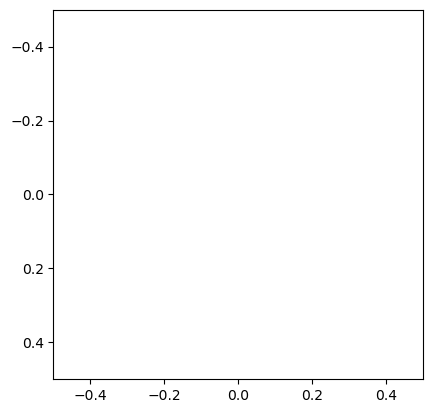

In [13]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("../input/goodreads-best-books/images/images/27851.jpg")
plt.imshow(image)
plt.show()

In [14]:
import torch
import os
import pandas as pd
import torchvision.transforms as T
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
import matplotlib.pyplot as plt
from torchvision.models import efficientnet_v2_s
import torch.nn as nn
import torchvision
from PIL import Image



class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, label_transform=None):
        self.img_labels = df
        self.img_dir = img_dir
        self.transform = transform
        self.label_transform = label_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_id = self.img_labels.iloc[idx]['index']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        try:
            img = Image.open(img_path)
            formatimg = T.ColorJitter()(img)
            img = img.convert('RGB')
        except RuntimeError:
            print(img_path)
            raise RuntimeError
        label = self.img_labels.iloc[idx]['book_title']
        score = self.img_labels.iloc[idx]['book_rating']
        if self.transform:
            img = self.transform(img)
        if self.label_transform:
            label = self.target_transform(label)
        return img, label, score

In [ ]:
to_drop = []
for i in range(len(df)):
    try:
        
        img_id = df.iloc[i]['index']
        img_path = os.path.join('../input/goodreads-best-books/images/images', f'{img_id}.jpg')
        image = read_image(img_path)
    except RuntimeError:
        to_drop.append(i)
df.drop(to_drop, inplace=True)

In [ ]:
len(df)

In [ ]:
full_dataset = CustomDataset('../input/goodreads-best-books/book_data.csv', '../input/goodreads-best-books/images/images', transform=torchvision.models.EfficientNet_V2_S_Weights.IMAGENET1K_V1.transforms())
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [ ]:
# Turn train and test Datasets into DataLoaders
import os
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32, # how many samples per batch?
                              num_workers=os.cpu_count(), # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True
                              ) # shuffle the data?

test_dataloader = DataLoader(dataset=test_dataset, 
                             batch_size=4, 
                             num_workers=os.cpu_count(),
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label, _ = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
class ImageModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.image_embed = efficientnet_v2_s(weights='DEFAULT')
        self.regression = nn.Sequential(
            nn.Linear(1000, 512),
            nn.PReLU(),
            nn.Linear(512, 256),
            nn.PReLU(),
            nn.Linear(256, 64),
            nn.PReLU(),
            nn.Linear(64, 8),
            nn.PReLU(),
            nn.Linear(8, 1),
            nn.PReLU(),
        )
        
    def forward(self, X):
        emb = self.image_embed(X)
        return self.regression(emb)

In [ ]:
model = ImageModel()

# **Training Image model**

In [ ]:
torch.manual_seed(42)
device = 'cuda'

In [ ]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X,label, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.type(torch.cuda.FloatTensor).to(device)
        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X,label, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.type(torch.cuda.FloatTensor).to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 5):
    model.to(device)
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:

results = train(model.to(device), train_dataloader, test_dataloader, torch.optim.Adagrad(model.parameters()), torch.nn.MSELoss().to(device), epochs=10)

In [27]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

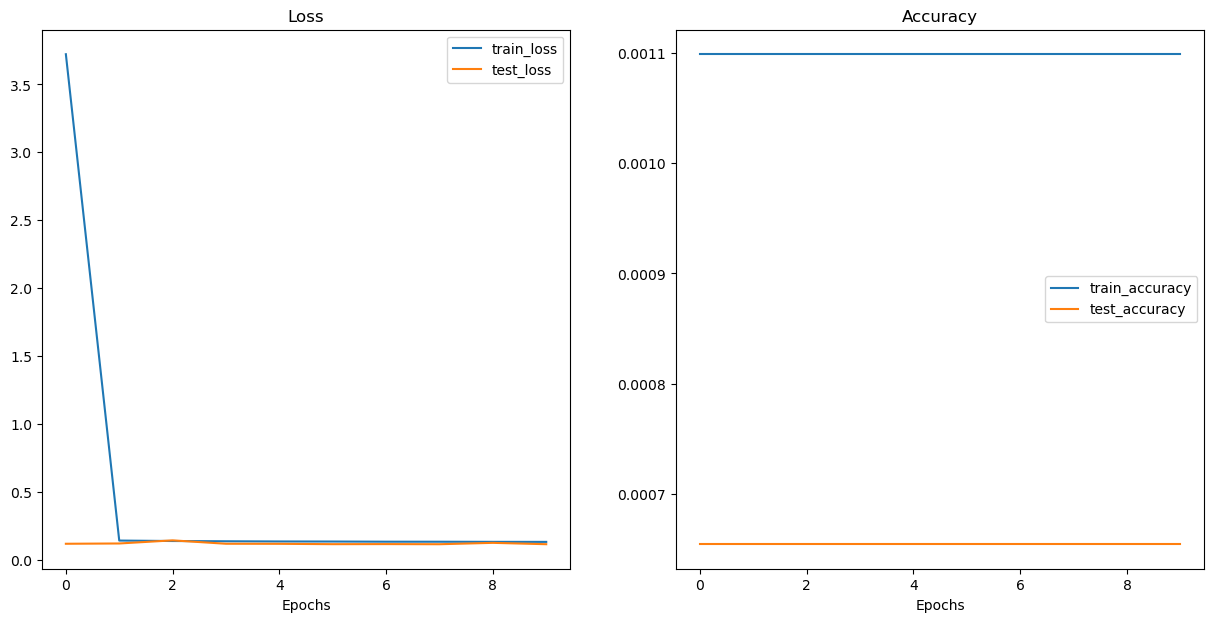

In [28]:
plot_loss_curves(results)

In [29]:
model.parameters()

<generator object Module.parameters at 0x7886262b1540>